In [1]:
# compare allbasin results with one basin results

In [9]:
import sys, os, glob, pickle, toml, json
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Compare with normKGE single objective optimization

In [22]:
# compare all KGE

bestkge = []
bestmae = []
bestmaxme = []
defakge = []

for tarbasin in range(627):
    inpath_moasmo = '/glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/Calib_HH_MOASMO_bigrange/'
    infile1 = f'{inpath_moasmo}/level1_{tarbasin}_MOASMOcalib/ctsm_outputs_normKGE/iter0_many_metric.csv'
    infile2 = f'{inpath_moasmo}/level1_{tarbasin}_MOASMOcalib/ctsm_outputs_emutest/iter1_many_metric.csv'
    infile3 = f'{inpath_moasmo}/level1_{tarbasin}_MOASMOcalib/ctsm_outputs_emutest/iter2_many_metric.csv'
    if os.path.isfile(infile1) and os.path.isfile(infile2) and os.path.isfile(infile3):
        df_iter0 = pd.read_csv(infile1)
        df_iter1 = pd.read_csv(infile2)
        df_iter2 = pd.read_csv(infile3)
    
        defakge.append(df_iter0['kge'].values[0])
        bestkge.append([ df_iter0['kge'].max(), df_iter1['kge'].max(), df_iter2['kge'].max()])
        bestmae.append([ df_iter0['mae'].min(), df_iter1['mae'].min(), df_iter2['mae'].min()])
        bestmaxme.append([ df_iter0['max_mon_abs_err'].min(), df_iter1['max_mon_abs_err'].min(), df_iter2['max_mon_abs_err'].min()])

bestkge = np.array(bestkge)
print(bestkge.shape)

# plt.plot(bestkge)
# plt.legend(['iter0', 'iter1', 'iter2'])
# plt.ylim(0, 1)
# plt.show()

bestkge = np.array(bestkge)
print('median bestkge iter0/iter1/iter2', np.nanmedian(bestkge,axis=0))
print('mean bestkge iter0/iter1/iter2', np.nanmean(bestkge,axis=0))
print('iter1 better than iter0', np.sum(bestkge[:,1]>bestkge[:,0]) / bestkge.shape[0])
print('iter2 better than iter0', np.sum(bestkge[:,2]>bestkge[:,0]) / bestkge.shape[0])


bestmae = np.array(bestmae)
print('median bestmae iter0/iter1/iter2', np.nanmedian(bestmae,axis=0))
print('mae: iter1 better than iter0', np.sum(bestmae[:,1]<bestmae[:,0]) / bestmae.shape[0])
print('mae: iter2 better than iter0', np.sum(bestmae[:,2]<bestmae[:,0]) / bestmae.shape[0])

bestmaxme = np.array(bestmaxme)
print('median bestmaxme iter0/iter1/iter2', np.nanmedian(bestmaxme,axis=0))
print('max_montherr: iter1 better than iter0', np.sum(bestmaxme[:,1]<bestmaxme[:,0]) / bestmaxme.shape[0])
print('max_montherr: iter2 better than iter0', np.sum(bestmaxme[:,2]<bestmaxme[:,0]) / bestmaxme.shape[0])

median bestkge iter0/iter1/iter2 [0.46116677 0.50478524 0.51495102]
mean bestkge iter0/iter1/iter2 [0.38221157 0.43016195 0.4530891 ]
iter1 better than iter0 0.810207336523126
iter2 better than iter0 0.8947368421052632
median bestmae iter0/iter1/iter2 [2.184786   2.41640451 2.3492212 ]
mae: iter1 better than iter0 0.3397129186602871
mae: iter2 better than iter0 0.42902711323763953
median bestmaxme iter0/iter1/iter2 [1.8468851  2.06054529 1.96654301]
max_montherr: iter1 better than iter0 0.3748006379585327
max_montherr: iter2 better than iter0 0.39553429027113235


In [26]:
v1 = np.nanmean(bestkge[:,0])
v2 = np.nanmean(np.max(bestkge[:,[0,1]],axis=1))
v3 = np.nanmean(np.max(bestkge[:,[0,1,2]],axis=1))
print('optimal kge based on all iterations: iter-0/1/2', v1, v2, v3)

optimal kge based on all iterations: iter-0/1/2 0.3822115716355069 0.43828481674862285 0.4595909770881588


In [17]:
normbestkge = bestkge / ( 2 - bestkge)
print('median normbestkge iter0/iter1/iter2', np.nanmedian(normbestkge,axis=0))
print('mean bestkge iter0/iter1/iter2', np.nanmean(normbestkge,axis=0))
print('iter1 better than iter0', np.sum(normbestkge[:,1]>normbestkge[:,0]) / normbestkge.shape[0])
print('iter2 better than iter0', np.sum(normbestkge[:,2]>normbestkge[:,0]) / normbestkge.shape[0])

median normbestkge iter0/iter1/iter2 [0.29968599 0.33760049 0.34675693]
mean bestkge iter0/iter1/iter2 [0.28946521 0.32121987 0.33912099]
iter1 better than iter0 0.810207336523126
iter2 better than iter0 0.8947368421052632


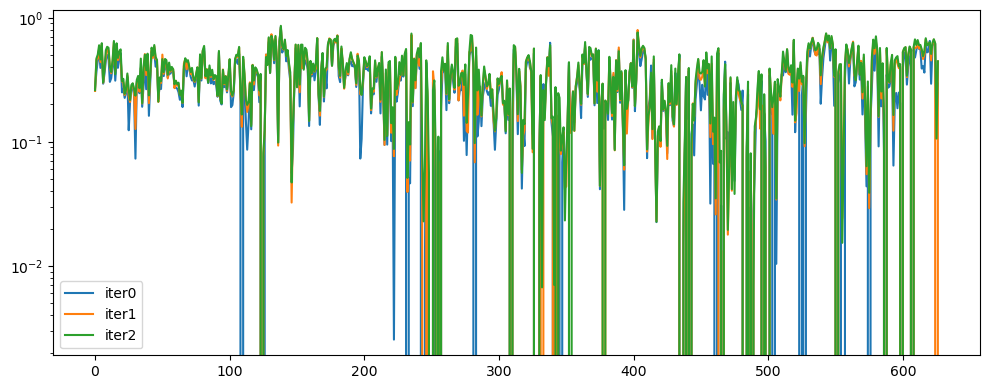

In [18]:
fig = plt.figure(figsize=[10,4])

normkge = bestkge / (2 - bestkge)

plt.plot(normkge)
plt.legend(['iter0', 'iter1', 'iter2'])
plt.yscale('log')

plt.tight_layout()
plt.show()

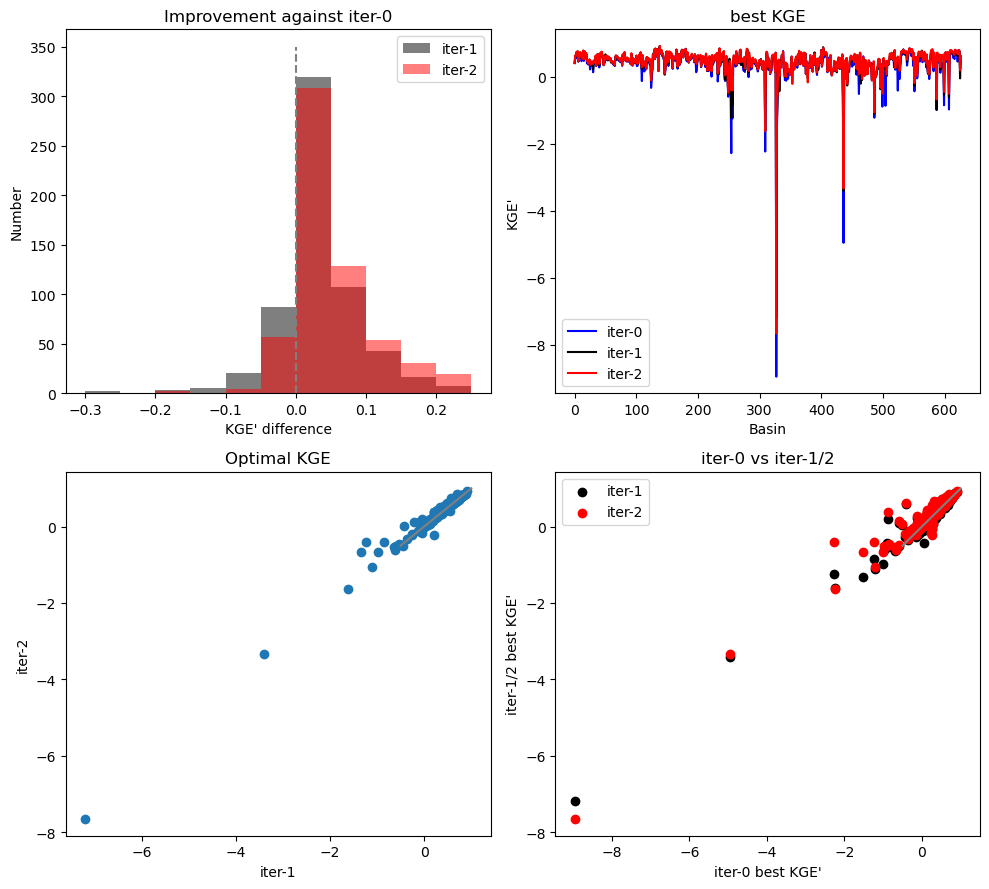

In [21]:
fig = plt.figure(figsize=[10, 9])

fig.add_subplot(2,2,1)
d1 = bestkge[:,1] - bestkge[:,0]
d2 = bestkge[:,2] - bestkge[:,0]
plt.hist(d1, np.arange(-0.3, 0.3, 0.05), alpha=0.5, facecolor='k', label='iter-1')
plt.hist(d2, np.arange(-0.3, 0.3, 0.05), alpha=0.5, facecolor='r', label='iter-2')
plt.plot([0, 0], [0, 350], '--', color='grey')
plt.title('Improvement against iter-0')
plt.xlabel("KGE' difference")
plt.ylabel('Number')
plt.legend()

fig.add_subplot(2,2,2)
plt.plot(bestkge[:,0], color='blue', label='iter-0')
plt.plot(bestkge[:,1], color='k', label='iter-1')
plt.plot(bestkge[:,2], color='r', label='iter-2')
plt.title('best KGE')
plt.xlabel("Basin")
plt.ylabel("KGE'")
plt.legend()

fig.add_subplot(2,2,3)
# b1 = np.max(bestkge[:,[0,1]],axis=1)
# b2 = np.max(bestkge[:,[0,2]],axis=1)
# plt.plot(b1, color='k', label='onebasin_emu')
# plt.plot(b2, color='r', label='allbasin_emu')
# plt.title('best(iter1+iter0)')
# plt.xlabel("Basin")
# plt.ylabel("KGE'")
# plt.legend()

# plt.plot(bestkge[:,0], color='blue', label='iter-0')
# plt.plot(bestkge[:,1], color='k', label='iter-1 onebasin_emu')
# plt.plot(bestkge[:,2], color='r', label='iter-1 allbasin_emu')
# plt.title('best KGE')
# plt.xlabel("Basin")
# plt.ylabel("KGE'")
# plt.legend()

plt.scatter(bestkge[:,1], bestkge[:,2])
plt.plot([-0.5, 1], [-0.5, 1], color='grey')
plt.title('Optimal KGE')
plt.xlabel("iter-1")
plt.ylabel("iter-2")


fig.add_subplot(2,2,4)
plt.scatter(bestkge[:,0], bestkge[:,1], color='k', label='iter-1')
plt.scatter(bestkge[:,0], bestkge[:,2], color='r', label='iter-2')
plt.plot([-0.5, 1], [-0.5, 1], color='grey')
plt.title('iter-0 vs iter-1/2')
plt.xlabel("iter-0 best KGE'")
plt.ylabel("iter-1/2 best KGE'")
plt.legend()

plt.tight_layout()
plt.show()